# importing the nessary libraries


In [4]:
from google_play_scraper import Sort, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt;



# creating the scraping  function

In [5]:
def scrape_reviews(app_id, bank_name, n_reviews=400):
    all_reviews = []
    count = 0

    while count < n_reviews:
        result, _ = reviews(
            app_id,
            lang="en",
            country="et",
            sort=Sort.NEWEST,
            count=200,
            filter_score_with=None
        )
        all_reviews.extend(result)
        count = len(all_reviews)

    df = pd.DataFrame(all_reviews)
    df["bank"] = bank_name
    df["source"] = "Google Play"
    df = df[["content", "score", "at", "bank", "source"]]
    df.columns = ["review", "rating", "date", "bank", "source"]
    return df

    

# scraping each dataset one by one

In [6]:
cbe = scrape_reviews("com.combanketh.mobilebanking","CBE");
boa = scrape_reviews("com.boa.boaMobileBanking","BOA");
dashen = scrape_reviews("com.dashen.dashensuperapp","Dashen");
# Combine the Reviews Into One Dataset
df_all  = pd.concat([cbe,boa,dashen],ignore_index = True);

# Clean and Preprocess the Data
 - removing duplicates
 - removing missing data
 - changing the date to appropirate format

In [7]:
from datetime import date
df_all.drop_duplicates(subset="review",inplace = True)
df_all.dropna(subset="review",inplace = True)
df_all["date"]  =pd.to_datetime(df_all["date"]).dt.date

# save the final clean dataset

In [12]:
df_all.to_csv("ethopian_bank_reviews.csv",index= False);

df_all.head()

,review,rating,date,bank,source
0,CBE ይለያል።,5,2025-11-29,CBE,Google Play
1,it's special for me,5,2025-11-29,CBE,Google Play
2,Make it user friendly.,2,2025-11-28,CBE,Google Play
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play
4,good app,5,2025-11-28,CBE,Google Play


# Ratings Distribution Per-Bank

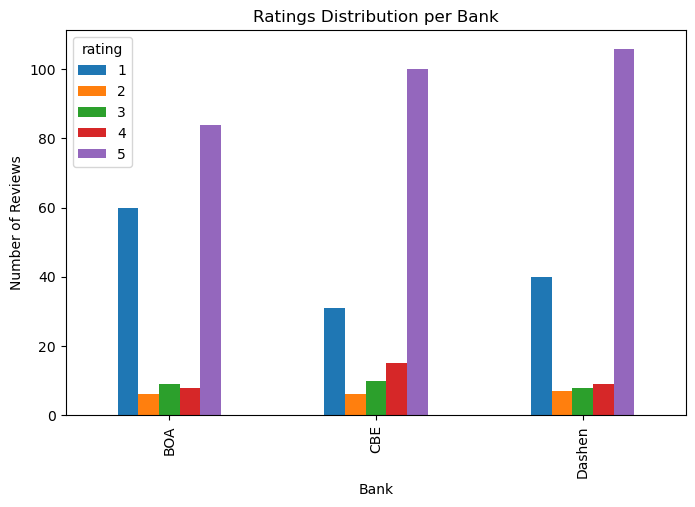

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Ratings distribution per bank
df_all.groupby(['bank', 'rating']).size().unstack().plot(kind='bar', figsize=(8,5))
plt.title("Ratings Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.show()


#  Review Count per Bank

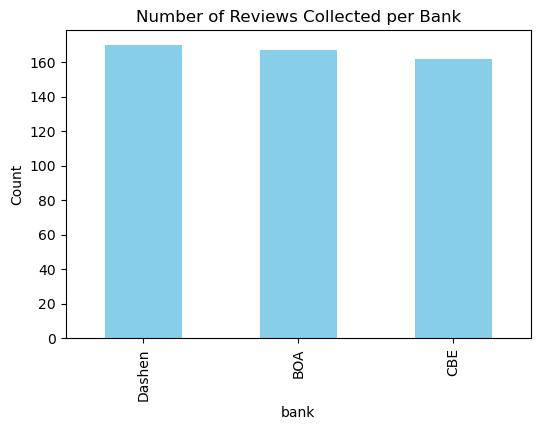

In [11]:
df_all['bank'].value_counts().plot(kind='bar', figsize=(6,4), color='skyblue')
plt.title("Number of Reviews Collected per Bank")
plt.ylabel("Count")
plt.show()
